In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Training DataFrame

In [3]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

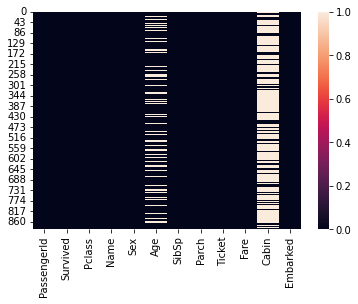

In [4]:
sns.heatmap(df_train.isna())

**Working with 'Age' column**

In [5]:
(df_train['Age'].isna().sum()/len(df_train['Age']))*100

19.865319865319865

In [6]:
df_train['Age'].fillna(df_train['Age'].mean(),inplace=True)

<AxesSubplot:>

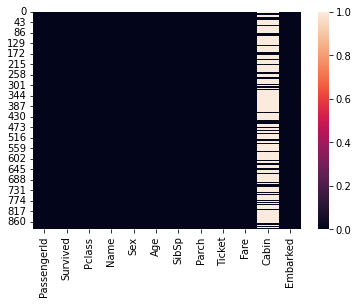

In [7]:
sns.heatmap(df_train.isna())

**Working with Cabin column**

In [8]:
(df_train['Cabin'].isna().sum()/len(df_train['Cabin']))*100

77.10437710437711

In [9]:
df_train.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:>

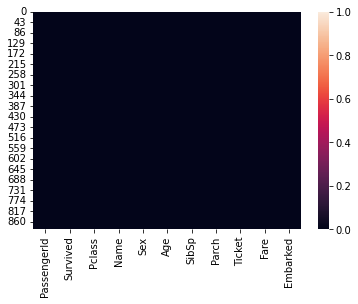

In [10]:
sns.heatmap(df_train.isna())

In [11]:
df_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

**Working with Embarked Column**

In [12]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
df_train.fillna('S',axis=1,inplace=True)

In [14]:
df_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Preparing the Training Data

In [15]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [16]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


**Converting non-numerical columns to numerical**

In [17]:
gender = pd.get_dummies(df_train['Sex'],drop_first=True)

In [18]:
df_train['Gender'] = gender

In [19]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,1


In [20]:
df_train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [21]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [22]:
embarked = pd.get_dummies(df_train['Embarked'])

In [23]:
df_train = pd.concat([df_train, embarked],axis=1)
df_train = df_train.rename(columns={"C": "Embarked_C", "S": "Embarked_S", "Q": "Embarked_Q"})

In [24]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,1,1,0,0


In [25]:
def age_categ(row):
    if row['Age'] <= 10:
        return 'children'
    elif row['Age'] > 10 and row['Age'] <= 20:
        return 'teenager'
    elif row['Age'] > 20 and row['Age'] <= 30:
        return 'young_adult'
    elif row['Age'] > 30 and row['Age'] <= 60:
        return 'adult'
    else: 
        return 'senior'
    
df_train['AgeCateg'] = df_train.apply(age_categ, axis=1)

In [26]:
age = pd.get_dummies(df_train['AgeCateg'])
df_train = pd.concat([df_train, age], axis=1)

In [27]:
pclass = pd.get_dummies(df_train['Pclass'])
df_train = pd.concat([df_train, pclass], axis=1)
df_train = df_train.rename(columns={1: "1stClass", 2: "2ndClass", 3: "3rdClass"})

In [28]:
# df_train.drop(['Pclass', 'Parch', 'Name', 'Sex', 'Age', 'Ticket', 'Fare', 'Embarked', 'AgeCateg'],axis=1,inplace=True)
df_train.drop(['Name', 'Sex', 'Age', 'Ticket', 'Fare', 'Embarked', 'AgeCateg'],axis=1,inplace=True)

df_train

,PassengerId,Survived,Pclass,SibSp,Parch,Gender,Embarked_C,Embarked_Q,Embarked_S,adult,children,senior,teenager,young_adult,1stClass,2ndClass,3rdClass
0,1,0,3,1,0,1,0,0,1,0,0,0,0,1,0,0,1
1,2,1,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0
2,3,1,3,0,0,0,0,0,1,0,0,0,0,1,0,0,1
3,4,1,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0
4,5,0,3,0,0,1,0,0,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,0,1,0,0,1,0,0,0,0,1,0,1,0
887,888,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0
888,889,0,3,1,2,0,0,0,1,0,0,0,0,1,0,0,1
889,890,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0


# Testing DataFrame

In [29]:
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<AxesSubplot:>

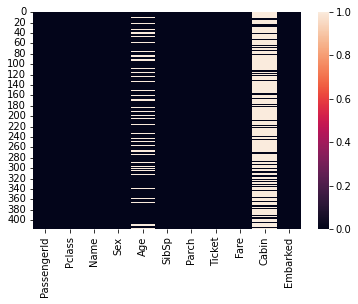

In [30]:
sns.heatmap(df_test.isna())

**Working with Age column**

In [31]:
(df_test['Age'].isna().sum()/len(df_test['Age']))*100

20.574162679425836

In [32]:
df_test['Age'].fillna(df_test['Age'].mean(),inplace=True)

<AxesSubplot:>

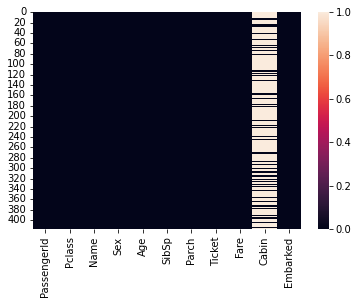

In [33]:
sns.heatmap(df_test.isna())

**Working with Cabin column**

In [34]:
(df_test['Cabin'].isna().sum()/len(df_test['Cabin']))*100

78.22966507177034

In [35]:
df_test.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:>

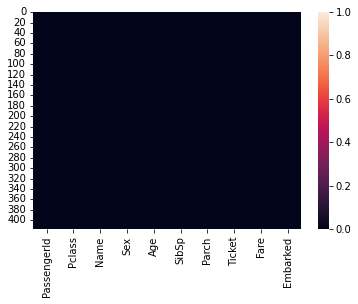

In [36]:
sns.heatmap(df_test.isna())

# Preparing the Testing Data

In [37]:
df_test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [38]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,S


**Converting non-numerical to numerical**

In [39]:
def age_categ(row):
    if row['Age'] <= 10:
        return 'children'
    elif row['Age'] > 10 and row['Age'] <= 20:
        return 'teenager'
    elif row['Age'] > 20 and row['Age'] <= 30:
        return 'young_adult'
    elif row['Age'] > 30 and row['Age'] <= 60:
        return 'adult'
    else: 
        return 'senior'

In [40]:
# Gender
gender = pd.get_dummies(df_test['Sex'],drop_first=True)
df_test['Gender'] = gender

# Embarked
embarked = pd.get_dummies(df_test['Embarked'])
df_test = pd.concat([df_test, embarked],axis=1)
df_test = df_test.rename(columns={"C": "Embarked_C", "S": "Embarked_S", "Q": "Embarked_Q"})

# Age
df_test['AgeCateg'] = df_test.apply(age_categ, axis=1)
age = pd.get_dummies(df_test['AgeCateg'])
df_test = pd.concat([df_test, age], axis=1)

# PClass
pclass = pd.get_dummies(df_test['Pclass'])
df_test = pd.concat([df_test, pclass], axis=1)
df_test = df_test.rename(columns={1: "1stClass", 2: "2ndClass", 3: "3rdClass"})

In [41]:
df_test.drop(['Name', 'Sex', 'Age', 'Ticket', 'Fare', 'Embarked', 'AgeCateg'],axis=1,inplace=True)


# Validating the DataFrames

In [42]:
df_train

,PassengerId,Survived,Pclass,SibSp,Parch,Gender,Embarked_C,Embarked_Q,Embarked_S,adult,children,senior,teenager,young_adult,1stClass,2ndClass,3rdClass
0,1,0,3,1,0,1,0,0,1,0,0,0,0,1,0,0,1
1,2,1,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0
2,3,1,3,0,0,0,0,0,1,0,0,0,0,1,0,0,1
3,4,1,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0
4,5,0,3,0,0,1,0,0,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,0,1,0,0,1,0,0,0,0,1,0,1,0
887,888,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0
888,889,0,3,1,2,0,0,0,1,0,0,0,0,1,0,0,1
889,890,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0


In [43]:
df_test

,PassengerId,Pclass,SibSp,Parch,Gender,Embarked_C,Embarked_Q,Embarked_S,adult,children,senior,teenager,young_adult,1stClass,2ndClass,3rdClass
0,892,3,0,0,1,0,1,0,1,0,0,0,0,0,0,1
1,893,3,1,0,0,0,0,1,1,0,0,0,0,0,0,1
2,894,2,0,0,1,0,1,0,0,0,1,0,0,0,1,0
3,895,3,0,0,1,0,0,1,0,0,0,0,1,0,0,1
4,896,3,1,1,0,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,0,1,0,0,1,1,0,0,0,0,0,0,1
414,1306,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0
415,1307,3,0,0,1,0,0,1,1,0,0,0,0,0,0,1
416,1308,3,0,0,1,0,0,1,1,0,0,0,0,0,0,1


# Separating the Variables

In [44]:
# Training DataFrame
# x_train = df_train[[SibSp', 'Gender', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'adult', 'children', 'senior', 'teenager', 'young_adult', '1stClass', '2ndClass', '3rdClass']]
x_train=df_train.iloc[:,2:]

# y_train = df_train['Survived']
y_train=df_train.Survived


# Testing DataFrame
# x_test = df_test[[SibSp', 'Gender', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'adult', 'children', 'senior', 'teenager', 'young_adult', '1stClass', '2ndClass', '3rdClass']]
x_test=df_test.iloc[:,1:]

In [45]:
x_train

,Pclass,SibSp,Parch,Gender,Embarked_C,Embarked_Q,Embarked_S,adult,children,senior,teenager,young_adult,1stClass,2ndClass,3rdClass
0,3,1,0,1,0,0,1,0,0,0,0,1,0,0,1
1,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0
2,3,0,0,0,0,0,1,0,0,0,0,1,0,0,1
3,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0
4,3,0,0,1,0,0,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,0,1,0,0,1,0,0,0,0,1,0,1,0
887,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0
888,3,1,2,0,0,0,1,0,0,0,0,1,0,0,1
889,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0


In [46]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [47]:
x_test

,Pclass,SibSp,Parch,Gender,Embarked_C,Embarked_Q,Embarked_S,adult,children,senior,teenager,young_adult,1stClass,2ndClass,3rdClass
0,3,0,0,1,0,1,0,1,0,0,0,0,0,0,1
1,3,1,0,0,0,0,1,1,0,0,0,0,0,0,1
2,2,0,0,1,0,1,0,0,0,1,0,0,0,1,0
3,3,0,0,1,0,0,1,0,0,0,0,1,0,0,1
4,3,1,1,0,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,0,0,1,0,0,1,1,0,0,0,0,0,0,1
414,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0
415,3,0,0,1,0,0,1,1,0,0,0,0,0,0,1
416,3,0,0,1,0,0,1,1,0,0,0,0,0,0,1


# Data Modeling

In [48]:
model = LogisticRegression()

In [49]:
model.fit(x_train, y_train)

LogisticRegression()

In [50]:
y_predict = model.predict(x_test)
y_predict

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [51]:
model.score(x_test,y_predict)

1.0

# Consolidating the Results

In [52]:
submission=pd.read_csv("/kaggle/input/titanic/gender_submission.csv")
report=classification_report(submission["Survived"],y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       266
           1       0.90      0.91      0.90       152

    accuracy                           0.93       418
   macro avg       0.92      0.93      0.93       418
weighted avg       0.93      0.93      0.93       418



In [53]:
data = pd.DataFrame(y_predict, columns=['survived'])

In [54]:
x_test

,Pclass,SibSp,Parch,Gender,Embarked_C,Embarked_Q,Embarked_S,adult,children,senior,teenager,young_adult,1stClass,2ndClass,3rdClass
0,3,0,0,1,0,1,0,1,0,0,0,0,0,0,1
1,3,1,0,0,0,0,1,1,0,0,0,0,0,0,1
2,2,0,0,1,0,1,0,0,0,1,0,0,0,1,0
3,3,0,0,1,0,0,1,0,0,0,0,1,0,0,1
4,3,1,1,0,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,0,0,1,0,0,1,1,0,0,0,0,0,0,1
414,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0
415,3,0,0,1,0,0,1,1,0,0,0,0,0,0,1
416,3,0,0,1,0,0,1,1,0,0,0,0,0,0,1


In [55]:
y_predict

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [56]:
data2 = df_test.PassengerId

In [57]:
result = pd.concat([data2, data],axis=1)
result

,PassengerId,survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [58]:
result.to_csv('kaggle_titanic_2.csv',index=False)